<a href="https://colab.research.google.com/github/manasdeshpande125/da6401_assignment1/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [ ]:
df=fashion_mnist
df

<module 'keras.api.datasets.fashion_mnist' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/fashion_mnist/__init__.py'>

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


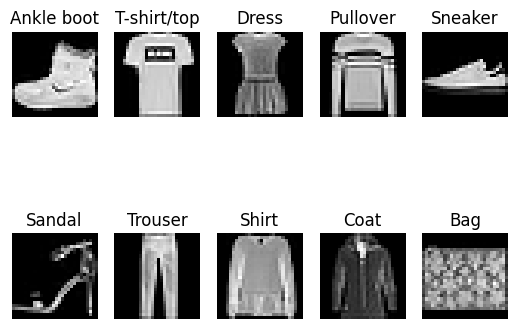

In [ ]:
s=set()
for i in range(len(trainX)):
    # Check if the label is not in the set and if we have not yet plotted 10 images
    if trainy[i] not in s and len(s) < 10:
        # Add the label to the set
        s.add(trainy[i])

        # Create a subplot for the image
        plt.subplot(2, 5, len(s))  # 2 rows, 5 columns, position based on the number of images plotted

        # Display the image in grayscale
        plt.imshow(trainX[i], cmap='gray')
        plt.title(f'{class_names[trainy[i]]}')
        plt.axis('off')

    elif len(s)>10:
      break

In [1]:
import numpy as np
X = [0.5,2.5]
Y = [0.2,0.9]
def f(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

def error(w,b):
  err = 0.0
  for x,y in zip(X,Y):
    fx = f(x,w,b)
    err += (fx-y)**2
  return 0.5*err

def grad_b(x,w,b,y):
  fx = f(x,w,b)
  return (fx-y)*fx*(1-fx)

def grad_w(x,w,b,y):
  fx = f(x,w,b)
  return (fx-y)*fx*(1-fx)*x

def do_gradient_descent():

  eta,max_epochs = 1.0,200
  w=[1,-2]
  b=[1,-2]

  for i in range(max_epochs):
    for j in range(2):
      dw,db = 0,0
      for x,y in zip(X,Y):
        dw += grad_w(x,w[j],b[j],y)
        db += grad_b(x,w[j],b[j],y)

      w[j] = w[j] - eta*dw
      b[j] = b[j] - eta*db
      if(i%10==0):
          print("Layer", j, " Epoch ",i," Error: ",error(w[j],b[j]))